In [175]:
import numpy as np
import pandas as pd
import os

In [176]:
data = pd.read_csv('weather.csv', encoding = 'cp949')

In [177]:
data.head(10)

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10)
0,108,서울,2011-11-08,14.9,NaN,2.1,65.0,10.8,1009.2,4.7,7.28,NaN,6.9
1,108,서울,2011-11-09,14.5,NaN,3.6,59.4,9.7,1009.9,5.4,6.76,NaN,6.6
2,108,서울,2011-11-10,14.1,NaN,3.0,54.1,8.6,1008.3,2.8,6.19,NaN,7.6
3,108,서울,2011-11-11,12.5,1.0,1.8,71.1,10.2,1006.1,0.0,3.69,NaN,8.6
4,108,서울,2011-11-12,12.0,NaN,2.1,66.5,9.1,1007.6,5.6,7.17,NaN,4.6
5,108,서울,2011-11-13,11.3,NaN,3.3,53.9,7.2,1008.9,6.2,8.93,NaN,3.4
6,108,서울,2011-11-14,6.4,NaN,2.9,37.3,3.5,1014.8,9.5,11.16,NaN,0.0
7,108,서울,2011-11-15,7.2,NaN,1.7,43.8,4.5,1019.9,9.3,9.74,NaN,0.8
8,108,서울,2011-11-16,10.9,NaN,2.2,51.1,6.6,1019.8,7.2,8.28,NaN,5.9
9,108,서울,2011-11-17,13.6,0.0,3.2,52.9,8.1,1015.4,0.2,3.51,NaN,8.5


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             3653 non-null   int64  
 1   지점명            3653 non-null   object 
 2   일시             3653 non-null   object 
 3   평균기온(°C)       3653 non-null   float64
 4   일강수량(mm)       1427 non-null   float64
 5   평균 풍속(m/s)     3650 non-null   float64
 6   평균 상대습도(%)     3653 non-null   float64
 7   평균 증기압(hPa)    3653 non-null   float64
 8   평균 현지기압(hPa)   3652 non-null   float64
 9   합계 일조시간(hr)    3642 non-null   float64
 10  합계 일사량(MJ/m2)  3629 non-null   float64
 11  일 최심적설(cm)     231 non-null    float64
 12  평균 전운량(1/10)   3653 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 371.1+ KB


In [179]:
data['지점명'].unique()

array(['서울'], dtype=object)

In [180]:
for col in data.columns:
    print("data: {:>12} has NaN data: {}".format(col, data[col].isnull().any()))

data:           지점 has NaN data: False
data:          지점명 has NaN data: False
data:           일시 has NaN data: False
data:     평균기온(°C) has NaN data: False
data:     일강수량(mm) has NaN data: True
data:   평균 풍속(m/s) has NaN data: True
data:   평균 상대습도(%) has NaN data: False
data:  평균 증기압(hPa) has NaN data: False
data: 평균 현지기압(hPa) has NaN data: True
data:  합계 일조시간(hr) has NaN data: True
data: 합계 일사량(MJ/m2) has NaN data: True
data:   일 최심적설(cm) has NaN data: True
data: 평균 전운량(1/10) has NaN data: False


<AxesSubplot:>

C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tiobi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from c

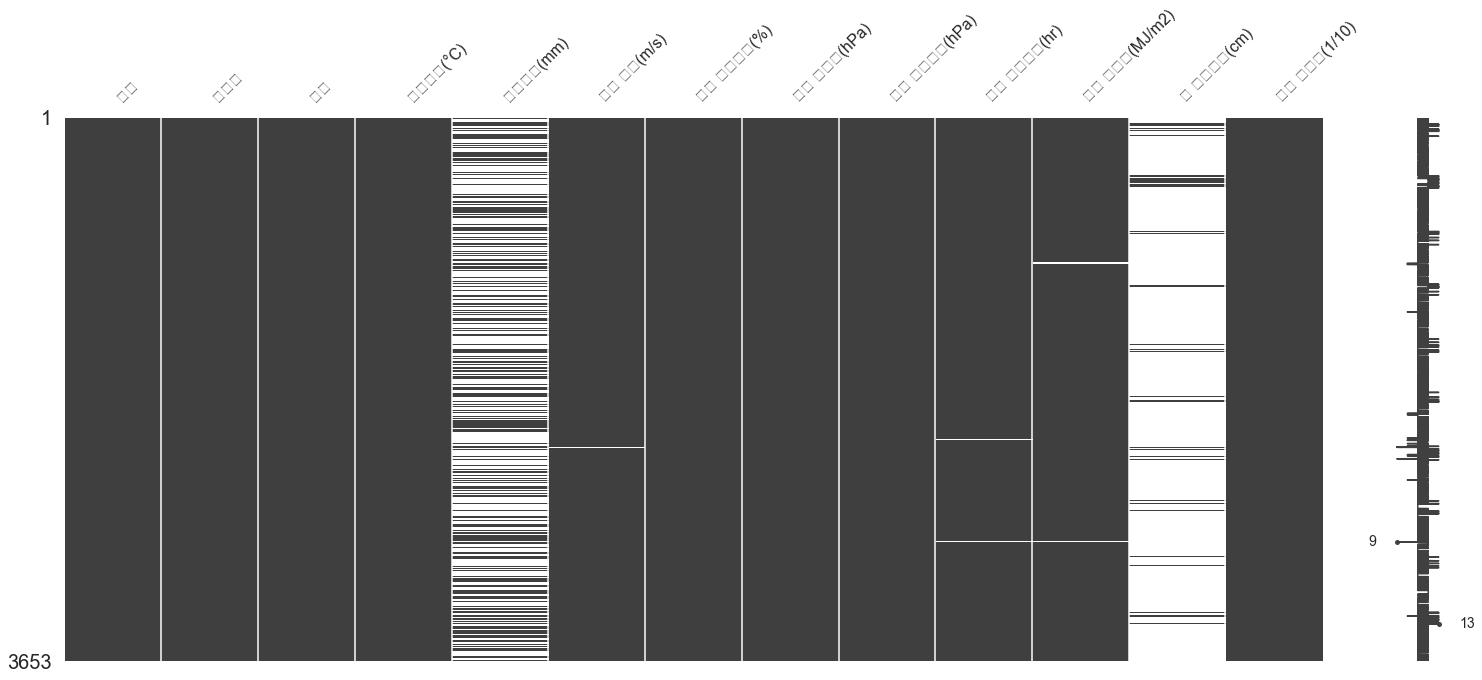

In [181]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df = data)

In [182]:
for col in data.columns:
    if data[col].isnull().any():
        print("data : {:>15} has {:.3}%% of NaN data".format(col, 100* data[col].isnull().sum()/len(data[col])))

data :        일강수량(mm) has 60.9%% of NaN data
data :      평균 풍속(m/s) has 0.0821%% of NaN data
data :    평균 현지기압(hPa) has 0.0274%% of NaN data
data :     합계 일조시간(hr) has 0.301%% of NaN data
data :   합계 일사량(MJ/m2) has 0.657%% of NaN data
data :      일 최심적설(cm) has 93.7%% of NaN data


In [183]:
fill_data = ['평균 풍속(m/s)', '평균 현지기압(hPa)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)']

for col in fill_data:
    data[col].fillna(np.nanmean(data[col]), inplace = True)
           

In [184]:
data['일강수량(mm)'].fillna(0, inplace = True)
data['일 최심적설(cm)'].fillna(0, inplace = True)

In [185]:
for col in data.columns:
    print("data: {:>12} has NaN data: {}".format(col, data[col].isnull().any()))

data:           지점 has NaN data: False
data:          지점명 has NaN data: False
data:           일시 has NaN data: False
data:     평균기온(°C) has NaN data: False
data:     일강수량(mm) has NaN data: False
data:   평균 풍속(m/s) has NaN data: False
data:   평균 상대습도(%) has NaN data: False
data:  평균 증기압(hPa) has NaN data: False
data: 평균 현지기압(hPa) has NaN data: False
data:  합계 일조시간(hr) has NaN data: False
data: 합계 일사량(MJ/m2) has NaN data: False
data:   일 최심적설(cm) has NaN data: False
data: 평균 전운량(1/10) has NaN data: False


In [186]:
input_temp = data.pop('평균기온(°C)')
data.pop('지점')
data.pop('지점명')
data.pop('일시')

input_data = data.values.reshape((data.shape[0], data.shape[1], 1))

print("data shape: ", input_data.shape)
print("temp shape: ", input_temp.shape)

data shape:  (3653, 9, 1)
temp shape:  (3653,)


In [187]:
train_data = input_data[:2500]
validation_data = input_data[2500:3000]
test_data = input_data[3000:]

train_label = input_temp[:2500]
validation_label = input_temp[2500:3000]
test_label = input_temp[3000:]

print("train data shape: ", train_data.shape)
print("train label shape: ", train_label.shape)
print("validation data shape: ", validation_data.shape)
print("validation label shape: ", validation_label.shape)
print("test data shape: ", test_data.shape)
print("test label shape: ", test_label.shape)

train data shape:  (2500, 9, 1)
train label shape:  (2500,)
validation data shape:  (500, 9, 1)
validation label shape:  (500,)
test data shape:  (653, 9, 1)
test label shape:  (653,)


In [188]:
# 머신러닝 라이브러리 로드

import keras
from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler

In [201]:
# 케라스 Functional API 모델 구축

input_shape = (9, 1)
input_dtype = 'float64'
model_input = Input(shape = (input_shape), dtype = input_dtype)
hidden_layer1 = Dense(32, activation='relu')(model_input)
dropout_layer = Dropout(0.25)(hidden_layer1)
hidden_layer2 = Dense(32, activation= 'relu')(dropout_layer)
model_output = Dense(1)(hidden_layer2)

model = Model(inputs = [model_input], outputs = [model_output])

In [202]:
# 모델 컴파일

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [205]:
# 모델 피팅, 히스토리 저장

model_hist = model.fit(train_data, train_label, batch_size = 1, epochs = 1000, validation_data = (validation_data, validation_label))

Epoch 1/1000
2500/2500 [==============================] - 1s 509us/step - loss: 116.1837 - mae: 9.2914 - val_loss: 100.8888 - val_mae: 8.5007
Epoch 2/1000
2500/2500 [==============================] - 1s 558us/step - loss: 116.0806 - mae: 9.2912 - val_loss: 99.6399 - val_mae: 8.4593
Epoch 3/1000
2500/2500 [==============================] - 1s 520us/step - loss: 116.4836 - mae: 9.3020 - val_loss: 97.8183 - val_mae: 8.3963
Epoch 4/1000
2500/2500 [==============================] - 1s 525us/step - loss: 116.6864 - mae: 9.3134 - val_loss: 97.5713 - val_mae: 8.3822
Epoch 5/1000
2500/2500 [==============================] - 1s 515us/step - loss: 116.0676 - mae: 9.2847 - val_loss: 101.1486 - val_mae: 8.5227
Epoch 6/1000
2500/2500 [==============================] - 1s 530us/step - loss: 116.4771 - mae: 9.2994 - val_loss: 97.8410 - val_mae: 8.3882
Epoch 7/1000
2500/2500 [==============================] - 1s 526us/step - loss: 116.1085 - mae: 9.2956 - val_loss: 101.0616 - val_mae: 8.5055
Epoch 8/10

KeyboardInterrupt: 

In [208]:
input_shape = (9, 1)
seq_model = keras.models.Sequential()
seq_model.add(Dense(64, input_shape = input_shape, activation = 'relu'))
seq_model.add(Dense(128, activation='relu'))
seq_model.add(Dense(1))